# Estudo de caso
### Realizando back tests para comparar o histórico de COE MAXP Prefixado x COE MAXP IPCA Alavancado
<hr>

#### Descrição:
<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Durante minha atuação enquanto assessor de investimentos, houve uma ocasião na qual me vi em dúvida em relação a qual seria o melhor dentre dois produtos de investimento disponibilizados pela corretora naquela ocasião. Esta dúvida rendeu muita discussão entre meus colegas de profissão.</p>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>De um lado, o <b>COE XP MAXP Prefixado</b>, uma estrutura que garantia o uma remuneração de pelo menos 50% no período, além do rendimento do fundo atrelado ao produto <i>(MerQube XP Multi Asset 6 VT)</i>.</p>

<br>
<img width='700px' src='fixo.png'>
</br>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Do outro lado, o <b>COE XP MAXP + IPCA Alavancado</b>, uma estrutura que garantia que não haveria queda, e no caso de alta, entregava IPCA + 2,5 vezes o rendimento do fundo atrelado ao produto <i>(MerQube XP Multi Asset 6 VT).</i></p>

<br>
<img width='700px' src='ipca.png'>
</br>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'><b>Vale ressaltar que este estudo tem fins educacionais, e que este documento não é uma recomendação de investimento.</b> Primeiro, pois estes ativos dentro das condições estabelecidas já não se encontram mais disponíveis para aquisição. Segundo, pois cada cliente possui objetivos que podem ou não se enquadrar para os produtos aqui citados. Por fim, aqui estamos olhando para o passado, a fim de ter uma visão do histórico retroativo destes produtos de modo a melhor embasar uma decisão de investimento futuro tomado naquela época, não devendo ser o único meio para tal decisão, mas uma ferramenta adicional para este fim.</p>



#### Links dos dados utilizados:

  - https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=o-que-e
  - https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm
  - https://merqube.com/index/MQMAXP6

In [1]:
#importando as bibliotecas a serem utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importando os arquivos históricos de IPCA, CDI e do fundo MAXP.
ipca = pd.read_excel("IPCA.xls")
cdi = pd.read_excel("CDI.xlsx")
maxp = pd.read_excel("MAXP.xlsx")

## Tratando os dados do IPCA

In [3]:
ipca.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,SÉRIE HISTÓRICA DO IPCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(continua)
2,NaN,NaN,NaN,NaN,NaN,VARIAÇÃO,NaN,NaN
3,ANO,MÊS,NÚMERO ÍNDICE,(%),NaN,NaN,NaN,NaN
4,NaN,NaN,(DEZ 93 = 100),NO,3,6,NO,12


In [4]:
# Renomeando as colunas
ipca = ipca.rename(columns={"Unnamed: 0":"ano","Unnamed: 1":"mes","Unnamed: 3":"var"})
ipca.head()

,ano,mes,Unnamed: 2,var,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,SÉRIE HISTÓRICA DO IPCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(continua)
2,NaN,NaN,NaN,NaN,NaN,VARIAÇÃO,NaN,NaN
3,ANO,MÊS,NÚMERO ÍNDICE,(%),NaN,NaN,NaN,NaN
4,NaN,NaN,(DEZ 93 = 100),NO,3,6,NO,12


In [5]:
# Removendo colunas desnecessárias
ipca = ipca.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'])
ipca = ipca.drop(0)
ipca = ipca.dropna(subset=["var"])
ipca.head()

,ano,mes,var
3,ANO,MÊS,(%)
4,NaN,NaN,NO
5,NaN,NaN,MÊS
7,1994,JAN,41.31
8,NaN,FEV,40.27


In [6]:
# Igualando linhas de ano NaN para valor válido
ipca['ano'] = ipca['ano'].fillna(method='ffill')
ipca.head()

,ano,mes,var
3,ANO,MÊS,(%)
4,ANO,NaN,NO
5,ANO,NaN,MÊS
7,1994,JAN,41.31
8,1994,FEV,40.27


In [7]:
# Removendo linhas de cabeçalho desnecessárias
ipca = ipca.drop(3)
ipca = ipca.drop(4)
ipca = ipca.drop(5)
ipca.head()

,ano,mes,var
7,1994,JAN,41.31
8,1994,FEV,40.27
9,1994,MAR,42.75
10,1994,ABR,42.68
11,1994,MAI,44.03


In [8]:
ipca.dtypes

ano    object
mes    object
var    object
dtype: object

In [9]:
# Convertendo 'ano' para integer para filtros posteriores
ipca['ano'] = pd.to_numeric(ipca['ano'], downcast="signed", errors='coerce')
ipca['ano']

7      1994.0
8      1994.0
9      1994.0
10     1994.0
11     1994.0
        ...  
414    2022.0
415    2022.0
416    2022.0
417    2022.0
418    2022.0
Name: ano, Length: 359, dtype: float64

In [10]:
# Filtrando ipca para anos de observância (>=2006)
filtro = ipca['ano'] >= 2006
ipca = ipca[filtro]
ipca.head()

,ano,mes,var
179,2006.0,JAN,0.59
180,2006.0,FEV,0.41
181,2006.0,MAR,0.43
182,2006.0,ABR,0.21
183,2006.0,MAI,0.1


In [11]:
# Resetando index para corrigir o DF
ipca.reset_index(drop=True, inplace = True)
ipca.head()

,ano,mes,var
0,2006.0,JAN,0.59
1,2006.0,FEV,0.41
2,2006.0,MAR,0.43
3,2006.0,ABR,0.21
4,2006.0,MAI,0.1


In [12]:
# Passando var para unitário e removendo coluna antiga
ipca["ipca_mes"] = (ipca["var"] / 100) + 1
ipca = ipca.drop(columns=['var'])
ipca

,ano,mes,ipca_mes
0,2006.0,JAN,1.0059
1,2006.0,FEV,1.0041
2,2006.0,MAR,1.0043
3,2006.0,ABR,1.0021
4,2006.0,MAI,1.001
...,...,...,...
195,2022.0,ABR,1.0106
196,2022.0,MAI,1.0047
197,2022.0,JUN,1.0067
198,2022.0,JUL,0.9932


In [13]:
# Criando um DataFrame auxiliar para multiplicar os resultados dentro do período selecionado
# Solução alternativa: df['coluna'].shift(periods=x, freq=y, fill_value=None)
periodo = 60

hist = pd.DataFrame(ipca.ipca_mes).copy()
x = range(periodo-1)
cont = 1
aux = hist.copy()

for i in x:
    aux = aux.drop(0)
    aux.reset_index(drop=True, inplace = True)
    hist[cont] = aux.ipca_mes
    cont += 1

hist = hist.dropna(axis=0).rename(columns={"ipca_mes":0})
hist

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.0059,1.0041,1.0043,1.0021,1.001,0.9979,1.0019,1.0005,1.0021,1.0033,...,1.0052,1.0057,1.0043,1.0,1.0001,1.0004,1.0045,1.0075,1.0083,1.0063
1,1.0041,1.0043,1.0021,1.001,0.9979,1.0019,1.0005,1.0021,1.0033,1.0031,...,1.0057,1.0043,1.0,1.0001,1.0004,1.0045,1.0075,1.0083,1.0063,1.0083
2,1.0043,1.0021,1.001,0.9979,1.0019,1.0005,1.0021,1.0033,1.0031,1.0048,...,1.0043,1.0,1.0001,1.0004,1.0045,1.0075,1.0083,1.0063,1.0083,1.008
3,1.0021,1.001,0.9979,1.0019,1.0005,1.0021,1.0033,1.0031,1.0048,1.0044,...,1.0,1.0001,1.0004,1.0045,1.0075,1.0083,1.0063,1.0083,1.008,1.0079
4,1.001,0.9979,1.0019,1.0005,1.0021,1.0033,1.0031,1.0048,1.0044,1.0044,...,1.0001,1.0004,1.0045,1.0075,1.0083,1.0063,1.0083,1.008,1.0079,1.0077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.0031,0.9977,1.0024,1.0019,1.0016,1.0042,1.0028,1.0044,1.0029,1.0032,...,1.0096,1.0087,1.0116,1.0125,1.0095,1.0073,1.0054,1.0101,1.0162,1.0106
137,0.9977,1.0024,1.0019,1.0016,1.0042,1.0028,1.0044,1.0029,1.0032,1.0009,...,1.0087,1.0116,1.0125,1.0095,1.0073,1.0054,1.0101,1.0162,1.0106,1.0047
138,1.0024,1.0019,1.0016,1.0042,1.0028,1.0044,1.0029,1.0032,1.0009,1.0022,...,1.0116,1.0125,1.0095,1.0073,1.0054,1.0101,1.0162,1.0106,1.0047,1.0067
139,1.0019,1.0016,1.0042,1.0028,1.0044,1.0029,1.0032,1.0009,1.0022,1.004,...,1.0125,1.0095,1.0073,1.0054,1.0101,1.0162,1.0106,1.0047,1.0067,0.9932


In [14]:
#Multiplicando as colunas para obter o resultado
res = hist.copy()
res['ipca_5_anos'] = 1
cont = 0
x = range(periodo)

for i in x:
    res['ipca_5_anos'] *= res [cont]
    res.drop(columns=[cont], inplace = True)
    cont += 1

res

,ipca_5_anos
0,1.260511
1,1.263518
2,1.268426
3,1.272972
4,1.280086
...,...
136,1.321927
137,1.324036
138,1.33598
139,1.323718


In [15]:
ipca['ipca_5_anos'] = res['ipca_5_anos']
ipca = ipca.dropna(axis=0)
ipca.head()

,ano,mes,ipca_mes,ipca_5_anos
0,2006.0,JAN,1.0059,1.260511
1,2006.0,FEV,1.0041,1.263518
2,2006.0,MAR,1.0043,1.268426
3,2006.0,ABR,1.0021,1.272972
4,2006.0,MAI,1.001,1.280086


In [16]:
# Remover setembro e outubro de 2022 para padronizar tabelas
ipca.drop(ipca.tail(1).index, inplace = True)
ipca

C:\Users\Pichau\AppData\Local\Temp\ipykernel_14024\2977524384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ipca.drop(ipca.tail(1).index, inplace = True)


,ano,mes,ipca_mes,ipca_5_anos
0,2006.0,JAN,1.0059,1.260511
1,2006.0,FEV,1.0041,1.263518
2,2006.0,MAR,1.0043,1.268426
3,2006.0,ABR,1.0021,1.272972
4,2006.0,MAI,1.001,1.280086
...,...,...,...,...
135,2017.0,ABR,1.0014,1.309893
136,2017.0,MAI,1.0031,1.321927
137,2017.0,JUN,0.9977,1.324036
138,2017.0,JUL,1.0024,1.33598


## Tratando os dados de CDI

In [17]:
cdi.head()

,Data,Nr. Operações,Volume,Média,Fator Diário,Mínima,Máxima,Moda,Dsv Pdr,Taxa SELIC
0,1986-03-06,ND,35.0,24.52,ND,ND,ND,ND,ND,ND
1,1986-03-10,ND,40.0,24.85,ND,ND,ND,ND,ND,ND
2,1986-03-12,ND,4.0,24.27,ND,ND,ND,ND,ND,ND
3,1986-03-14,ND,30.0,7.75,ND,ND,ND,ND,ND,ND
4,1986-03-17,ND,620.0,24.56,ND,ND,ND,ND,ND,ND


In [18]:
# Retirando colunas desnecessárias
cdi = cdi.drop(columns=['Nr. Operações','Volume','Fator Diário','Mínima','Máxima','Moda','Dsv Pdr','Taxa SELIC'])
cdi.head()

,Data,Média
0,1986-03-06,24.52
1,1986-03-10,24.85
2,1986-03-12,24.27
3,1986-03-14,7.75
4,1986-03-17,24.56


In [19]:
# Filtrando apenas para > 2006
selecao = (cdi['Data'] >= '2006-01-01')
cdi = cdi[selecao]
cdi.head()

,Data,Média
4943,2006-01-02,17.94
4944,2006-01-03,17.94
4945,2006-01-04,17.93
4946,2006-01-05,17.92
4947,2006-01-06,17.92


In [20]:
# Filtrando para apenas um dia por mês
cdi['Data_Auxiliar'] = cdi['Data']

def formatar_data (x):
    return x.strftime('%y %m')

cdi['Data_Auxiliar'] = cdi['Data_Auxiliar'].apply(formatar_data)

cdi = cdi.drop_duplicates(subset=['Data_Auxiliar'])

cdi.head()

,Data,Média,Data_Auxiliar
4943,2006-01-02,17.94,06 01
4965,2006-02-01,17.15,06 02
4983,2006-03-01,17.29,06 03
5006,2006-04-03,16.45,06 04
5024,2006-05-02,15.69,06 05


In [21]:
# Resetando index para corrigir o DF
cdi.reset_index(drop=True, inplace = True)
cdi.head()

,Data,Média,Data_Auxiliar
0,2006-01-02,17.94,06 01
1,2006-02-01,17.15,06 02
2,2006-03-01,17.29,06 03
3,2006-04-03,16.45,06 04
4,2006-05-02,15.69,06 05


In [22]:
# Criando coluna que avalia a variação do CDI no mês
# Removendo colunas desnecessárias
# Renomeando colunas para padronizar todas tabelas
cdi['cdi_mes'] = ((cdi['Média']/100)+1) ** (1/12)
cdi = cdi.drop(columns=['Média','Data_Auxiliar'])
cdi = cdi.rename(columns={"Data":"data"})
cdi

,data,cdi_mes
0,2006-01-02,1.013845
1,2006-02-01,1.013278
2,2006-03-01,1.013379
3,2006-04-03,1.012772
4,2006-05-02,1.012219
...,...,...
197,2022-06-01,1.009976
198,2022-07-01,1.010349
199,2022-08-01,1.010349
200,2022-09-01,1.010720


In [23]:
# Criando um DataFrame auxiliar para multiplicar os resultados dentro do período selecionado
periodo = 60

hist = pd.DataFrame(cdi.cdi_mes).copy()
x = range(periodo-1)
cont = 1
aux = hist.copy()

for i in x:
    aux = aux.drop(0)
    aux.reset_index(drop=True, inplace = True)
    hist[cont] = aux.cdi_mes
    cont += 1

hist = hist.dropna(axis=0).rename(columns={"cdi_mes":0})
hist

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.013845,1.013278,1.013379,1.012772,1.012219,1.011825,1.011847,1.011429,1.011075,1.011097,...,1.006907,1.006883,1.007522,1.007515,1.008081,1.008469,1.008454,1.008462,1.008462,1.008462
1,1.013278,1.013379,1.012772,1.012219,1.011825,1.011847,1.011429,1.011075,1.011097,1.010712,...,1.006883,1.007522,1.007515,1.008081,1.008469,1.008454,1.008462,1.008462,1.008462,1.008462
2,1.013379,1.012772,1.012219,1.011825,1.011847,1.011429,1.011075,1.011097,1.010712,1.010341,...,1.007522,1.007515,1.008081,1.008469,1.008454,1.008462,1.008462,1.008462,1.008462,1.008841
3,1.012772,1.012219,1.011825,1.011847,1.011429,1.011075,1.011097,1.010712,1.010341,1.010356,...,1.007515,1.008081,1.008469,1.008454,1.008462,1.008462,1.008462,1.008462,1.008841,1.008856
4,1.012219,1.011825,1.011847,1.011429,1.011075,1.011097,1.010712,1.010341,1.010356,1.010177,...,1.008081,1.008469,1.008454,1.008462,1.008462,1.008462,1.008462,1.008841,1.008856,1.009241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1.008081,1.007315,1.007315,1.006543,1.005959,1.005959,1.005568,1.005568,1.005372,1.005175,...,1.004194,1.004986,1.006162,1.006162,1.007323,1.007323,1.008469,1.009226,1.009226,1.009976
139,1.007315,1.007315,1.006543,1.005959,1.005959,1.005568,1.005568,1.005372,1.005175,1.005175,...,1.004986,1.006162,1.006162,1.007323,1.007323,1.008469,1.009226,1.009226,1.009976,1.010349
140,1.007315,1.006543,1.005959,1.005959,1.005568,1.005568,1.005372,1.005175,1.005175,1.005175,...,1.006162,1.006162,1.007323,1.007323,1.008469,1.009226,1.009226,1.009976,1.010349,1.010349
141,1.006543,1.005959,1.005959,1.005568,1.005568,1.005372,1.005175,1.005175,1.005175,1.005175,...,1.006162,1.007323,1.007323,1.008469,1.009226,1.009226,1.009976,1.010349,1.010349,1.010720


In [24]:
#Multiplicando as colunas para obter o resultado
res = hist.copy()
res['cdi_5_anos'] = 1
cont = 0
x = range(periodo)

for i in x:
    res['cdi_5_anos'] *= res [cont]
    res.drop(columns=[cont], inplace = True)
    cont += 1

res

,cdi_5_anos
0,1.752478
1,1.743171
2,1.735538
3,1.727792
4,1.721767
...,...
138,1.326045
139,1.329028
140,1.333030
141,1.337535


In [25]:
cdi['cdi_5_anos'] = res['cdi_5_anos']
cdi = cdi.dropna(axis=0)
cdi.drop(cdi.tail(3).index,inplace = True)
cdi

C:\Users\Pichau\AppData\Local\Temp\ipykernel_14024\3256986794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdi.drop(cdi.tail(3).index,inplace = True)


,data,cdi_mes,cdi_5_anos
0,2006-01-02,1.013845,1.752478
1,2006-02-01,1.013278,1.743171
2,2006-03-01,1.013379,1.735538
3,2006-04-03,1.012772,1.727792
4,2006-05-02,1.012219,1.721767
...,...,...,...
135,2017-04-03,1.009586,1.323515
136,2017-05-02,1.008833,1.323042
137,2017-06-01,1.008081,1.323557
138,2017-07-03,1.008081,1.326045


## Tratando os dados do Fundo MAXP

In [26]:
maxp.head()

,DateTime,MQMAXP6
0,2005-02-16,100.00
1,2005-02-17,99.74
2,2005-02-18,99.74
3,2005-02-22,99.51
4,2005-02-23,99.83


In [27]:
maxp = maxp.rename(columns={"DateTime":"data","MQMAXP6 ":"evolucao"})
maxp['evolucao'] = maxp['evolucao'] / 100

In [28]:
# Filtrando apenas para > 2006
selecao = (maxp['data'] >= '2006-01-01')
maxp = maxp[selecao]
maxp.head()

,data,evolucao
221,2006-01-03,1.0347
222,2006-01-04,1.0375
223,2006-01-05,1.0330
224,2006-01-06,1.0386
225,2006-01-09,1.0420


In [29]:
# Filtrando para apenas um dia por mês
maxp['data_auxiliar'] = maxp['data']

def formatar_data (x):
    return x.strftime('%y %m')

maxp['data_auxiliar'] = maxp['data_auxiliar'].apply(formatar_data)

maxp = maxp.drop_duplicates(subset=['data_auxiliar'])

maxp.drop(maxp.tail(1).index, inplace = True)
maxp.reset_index(drop=True, inplace = True)

maxp

,data,evolucao,data_auxiliar
0,2006-01-03,1.0347,06 01
1,2006-02-01,1.0396,06 02
2,2006-03-01,1.0344,06 03
3,2006-04-03,1.0248,06 04
4,2006-05-01,1.0349,06 05
...,...,...,...
196,2022-05-02,2.1435,22 05
197,2022-06-01,2.1380,22 06
198,2022-07-01,2.0926,22 07
199,2022-08-01,2.1194,22 08


In [30]:
#Executa calculos para definir coluna mensal do indice
temp = maxp.evolucao
temp = temp.drop(0)
temp.reset_index(drop=True, inplace = True)
maxp['evolucao +1'] = temp
maxp['maxp_mes'] = (maxp['evolucao +1'] / maxp['evolucao'])
maxp = maxp.drop(columns=['evolucao','evolucao +1','data_auxiliar'])
maxp.drop(maxp.tail(1).index, inplace = True)
maxp

,data,maxp_mes
0,2006-01-03,1.004736
1,2006-02-01,0.994998
2,2006-03-01,0.990719
3,2006-04-03,1.009856
4,2006-05-01,0.990047
...,...,...
195,2022-04-01,0.963414
196,2022-05-02,0.997434
197,2022-06-01,0.978765
198,2022-07-01,1.012807


In [31]:
# Criando um DataFrame auxiliar para multiplicar os resultados dentro do período selecionado
periodo = 60

hist = pd.DataFrame(maxp.maxp_mes).copy()
x = range(periodo-1)
cont = 1
aux = hist.copy()

for i in x:
    aux = aux.drop(0)
    aux.reset_index(drop=True, inplace = True)
    hist[cont] = aux.maxp_mes
    cont += 1

hist = hist.dropna(axis=0).rename(columns={"maxp_mes":0})
hist

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.004736,0.994998,0.990719,1.009856,0.990047,0.993461,1.009529,1.008369,0.994789,1.012224,...,1.012668,1.029921,0.988921,0.994357,1.014188,1.016129,1.044380,1.024194,1.000454,1.010216
1,0.994998,0.990719,1.009856,0.990047,0.993461,1.009529,1.008369,0.994789,1.012224,1.022427,...,1.029921,0.988921,0.994357,1.014188,1.016129,1.044380,1.024194,1.000454,1.010216,0.999101
2,0.990719,1.009856,0.990047,0.993461,1.009529,1.008369,0.994789,1.012224,1.022427,0.975347,...,0.988921,0.994357,1.014188,1.016129,1.044380,1.024194,1.000454,1.010216,0.999101,1.026018
3,1.009856,0.990047,0.993461,1.009529,1.008369,0.994789,1.012224,1.022427,0.975347,1.005574,...,0.994357,1.014188,1.016129,1.044380,1.024194,1.000454,1.010216,0.999101,1.026018,1.006869
4,0.990047,0.993461,1.009529,1.008369,0.994789,1.012224,1.022427,0.975347,1.005574,1.003058,...,1.014188,1.016129,1.044380,1.024194,1.000454,1.010216,0.999101,1.026018,1.006869,1.048701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,1.009749,0.977146,1.024014,1.016611,0.991830,1.012961,1.012616,1.017359,1.013581,0.973660,...,1.025029,1.003228,0.977156,1.022172,0.998003,1.015414,0.977655,1.024550,0.994635,0.963414
137,0.977146,1.024014,1.016611,0.991830,1.012961,1.012616,1.017359,1.013581,0.973660,1.005469,...,1.003228,0.977156,1.022172,0.998003,1.015414,0.977655,1.024550,0.994635,0.963414,0.997434
138,1.024014,1.016611,0.991830,1.012961,1.012616,1.017359,1.013581,0.973660,1.005469,0.986664,...,0.977156,1.022172,0.998003,1.015414,0.977655,1.024550,0.994635,0.963414,0.997434,0.978765
139,1.016611,0.991830,1.012961,1.012616,1.017359,1.013581,0.973660,1.005469,0.986664,1.003853,...,1.022172,0.998003,1.015414,0.977655,1.024550,0.994635,0.963414,0.997434,0.978765,1.012807


In [32]:
#Multiplicando as colunas para obter o resultado
res = hist.copy()
res['maxp_5_anos'] = 1
cont = 0
x = range(periodo)

for i in x:
    res['maxp_5_anos'] *= res [cont]
    res.drop(columns=[cont], inplace = True)
    cont += 1

res

,maxp_5_anos
0,1.290132
1,1.282897
2,1.322892
3,1.344457
4,1.396174
...,...
136,1.322577
137,1.306447
138,1.308611
139,1.294290


In [33]:
maxp['maxp_5_anos'] = res['maxp_5_anos']
maxp = maxp.dropna(axis=0)
maxp.drop(maxp.tail(1).index, inplace = True)
maxp

C:\Users\Pichau\AppData\Local\Temp\ipykernel_14024\2672378104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxp.drop(maxp.tail(1).index, inplace = True)


,data,maxp_mes,maxp_5_anos
0,2006-01-03,1.004736,1.290132
1,2006-02-01,0.994998,1.282897
2,2006-03-01,0.990719,1.322892
3,2006-04-03,1.009856,1.344457
4,2006-05-01,0.990047,1.396174
...,...,...,...
135,2017-04-03,1.004711,1.379270
136,2017-05-01,1.009749,1.322577
137,2017-06-01,0.977146,1.306447
138,2017-07-03,1.024014,1.308611


## Consolidando tabelas e realizando testes

In [34]:
dados = cdi.copy()
dados['ipca_mes'] = ipca['ipca_mes']
dados['ipca_5_anos'] = ipca['ipca_5_anos']
dados['maxp_mes'] = maxp['maxp_mes']
dados['maxp_5_anos'] = maxp['maxp_5_anos']
dados

,data,cdi_mes,cdi_5_anos,ipca_mes,ipca_5_anos,maxp_mes,maxp_5_anos
0,2006-01-02,1.013845,1.752478,1.0059,1.260511,1.004736,1.290132
1,2006-02-01,1.013278,1.743171,1.0041,1.263518,0.994998,1.282897
2,2006-03-01,1.013379,1.735538,1.0043,1.268426,0.990719,1.322892
3,2006-04-03,1.012772,1.727792,1.0021,1.272972,1.009856,1.344457
4,2006-05-02,1.012219,1.721767,1.001,1.280086,0.990047,1.396174
...,...,...,...,...,...,...,...
135,2017-04-03,1.009586,1.323515,1.0014,1.309893,1.004711,1.379270
136,2017-05-02,1.008833,1.323042,1.0031,1.321927,1.009749,1.322577
137,2017-06-01,1.008081,1.323557,0.9977,1.324036,0.977146,1.306447
138,2017-07-03,1.008081,1.326045,1.0024,1.33598,1.024014,1.308611


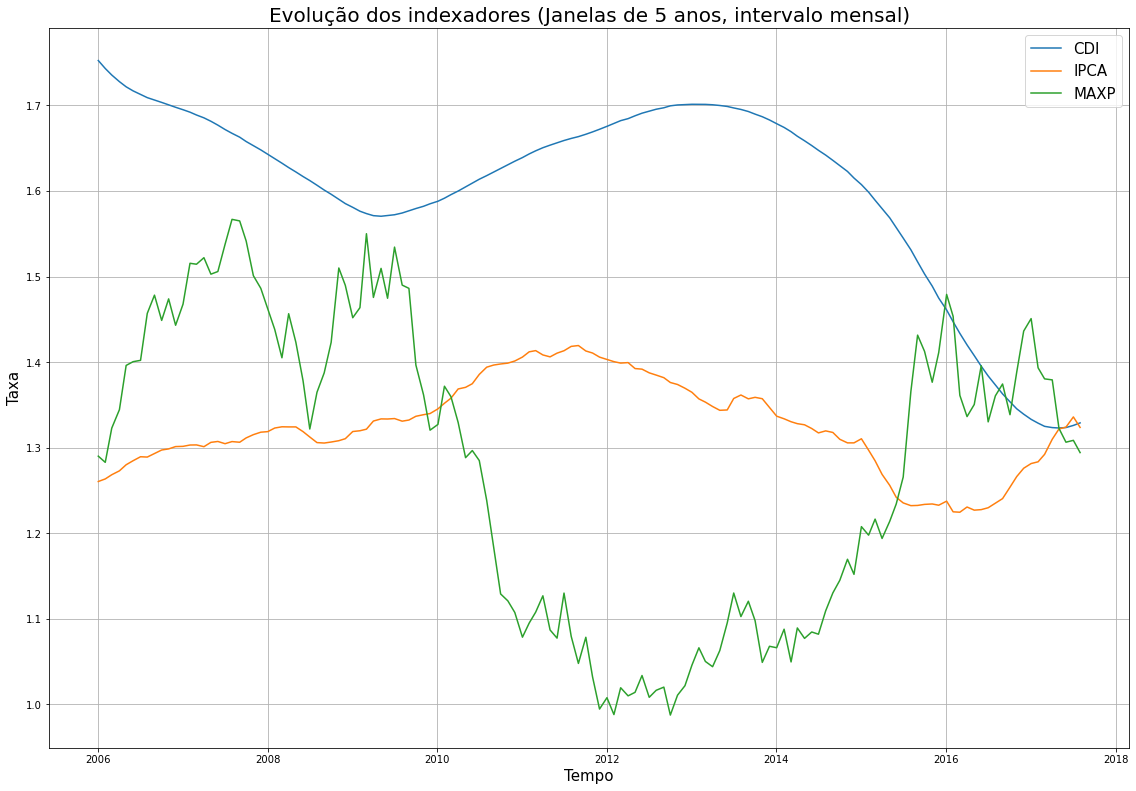

In [41]:
fig = plt.figure(figsize = (15, 10))
gf1 = fig.add_axes([0,0,1,1])
gf1.plot(dados['data'], dados['cdi_5_anos'])
gf1.plot(dados['data'], dados['ipca_5_anos'])
gf1.plot(dados['data'], dados['maxp_5_anos'])

gf1.set_title('Evolução dos indexadores (Janelas de 5 anos, intervalo mensal)', fontsize = 20)
gf1.set_ylabel('Taxa', fontsize=15)
gf1.set_xlabel('Tempo', fontsize=15)
gf1.legend(['CDI', 'IPCA', 'MAXP'], loc='best', fontsize=15)
gf1.grid(True)

In [36]:
dados['coe_fixo'] = dados['maxp_5_anos'] + 0.5
dados['coe_ipca'] = (((dados['maxp_5_anos']-1)*2.5)+1) + (dados['ipca_5_anos']-1)
dados

,data,cdi_mes,cdi_5_anos,ipca_mes,ipca_5_anos,maxp_mes,maxp_5_anos,coe_fixo,coe_ipca
0,2006-01-02,1.013845,1.752478,1.0059,1.260511,1.004736,1.290132,1.790132,1.985842
1,2006-02-01,1.013278,1.743171,1.0041,1.263518,0.994998,1.282897,1.782897,1.970761
2,2006-03-01,1.013379,1.735538,1.0043,1.268426,0.990719,1.322892,1.822892,2.075657
3,2006-04-03,1.012772,1.727792,1.0021,1.272972,1.009856,1.344457,1.844457,2.134116
4,2006-05-02,1.012219,1.721767,1.001,1.280086,0.990047,1.396174,1.896174,2.27052
...,...,...,...,...,...,...,...,...,...
135,2017-04-03,1.009586,1.323515,1.0014,1.309893,1.004711,1.379270,1.879270,2.258068
136,2017-05-02,1.008833,1.323042,1.0031,1.321927,1.009749,1.322577,1.822577,2.128369
137,2017-06-01,1.008081,1.323557,0.9977,1.324036,0.977146,1.306447,1.806447,2.090153
138,2017-07-03,1.008081,1.326045,1.0024,1.33598,1.024014,1.308611,1.808611,2.107508


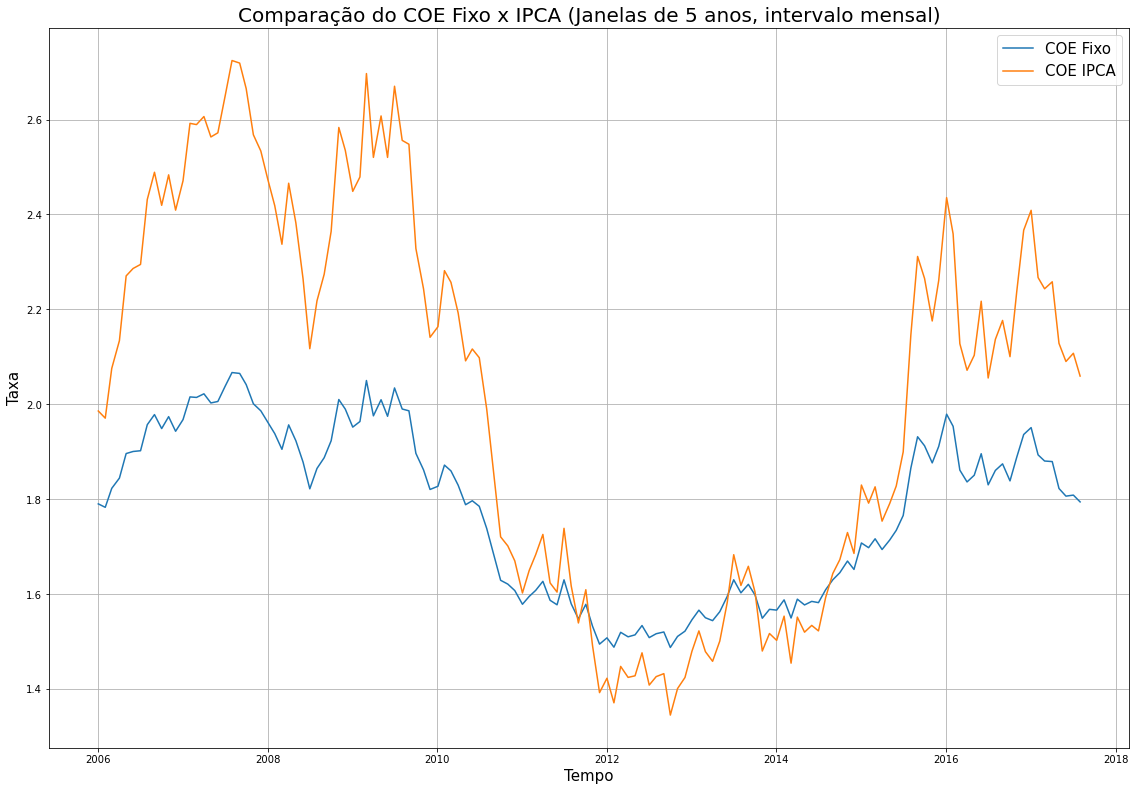

In [40]:
fig = plt.figure(figsize = (15, 10))
gf2 = fig.add_axes([0,0,1,1])
gf2.plot(dados['data'], dados['coe_fixo'])
gf2.plot(dados['data'], dados['coe_ipca'])

gf2.set_title('Comparação do COE Fixo x IPCA (Janelas de 5 anos, intervalo mensal)', fontsize = 20)
gf2.set_ylabel('Taxa', fontsize=15)
gf2.set_xlabel('Tempo', fontsize=15)
gf2.legend(['COE Fixo', 'COE IPCA'], loc='best', fontsize=15)
gf2.grid(True)

In [38]:
dados.loc[ dados['coe_ipca'] > dados['coe_fixo'], 'comparador' ] = 1
dados.loc[ dados['coe_ipca'] < dados['coe_fixo'], 'comparador' ] = 0
dados.head()


,data,cdi_mes,cdi_5_anos,ipca_mes,ipca_5_anos,maxp_mes,maxp_5_anos,coe_fixo,coe_ipca,comparador
0,2006-01-02,1.013845,1.752478,1.0059,1.260511,1.004736,1.290132,1.790132,1.985842,1.0
1,2006-02-01,1.013278,1.743171,1.0041,1.263518,0.994998,1.282897,1.782897,1.970761,1.0
2,2006-03-01,1.013379,1.735538,1.0043,1.268426,0.990719,1.322892,1.822892,2.075657,1.0
3,2006-04-03,1.012772,1.727792,1.0021,1.272972,1.009856,1.344457,1.844457,2.134116,1.0
4,2006-05-02,1.012219,1.721767,1.001,1.280086,0.990047,1.396174,1.896174,2.27052,1.0


In [39]:
percentual = ( dados['comparador'].sum() / dados.shape[0] ) * 100
print('Foi observado um resultado superior para o COE IPCA em relação ao COE CDI em {}% das janelas de  5 anos observadas entre 01/2006 e 08/2022, intervalos mensais.'.format(percentual.round(2)))

Foi observado um resultado superior para o COE IPCA em relação ao COE CDI em 77.86% das janelas de  5 anos observadas entre 01/2006 e 08/2022, intervalos mensais.
